In [1]:
!pip install -q legendgram palettable mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.6 MB/s eta 0:00:00


In [2]:
!wget https://github.com/Gustavoohs/Dados/raw/refs/heads/master/Dados/Vector/MT_indices.zip
!unzip MT_indices.zip

--2025-01-23 13:55:12--  https://github.com/Gustavoohs/Dados/raw/refs/heads/master/Dados/Vector/MT_indices.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/Gustavoohs/Dados/refs/heads/master/Dados/Vector/MT_indices.zip [following]
--2025-01-23 13:55:12--  https://media.githubusercontent.com/media/Gustavoohs/Dados/refs/heads/master/Dados/Vector/MT_indices.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3890842 (3.7M) [application/zip]
Saving to: ‘MT_indices.zip’

MT_indices.zip      100%[===================>]   3.71M  10.7MB/s    in 0.3s    

2025-01-23 13:55:15 (10.7 MB/

In [3]:
# Bibliotecas
import geopandas as gpd
from legendgram import legendgram
import matplotlib.pyplot as plt
import numpy as np
import palettable.matplotlib as mplpal
from mapclassify import NaturalBreaks

In [4]:
# Leitura do arquivo vetorial
gdf = gpd.read_file('/content/MT_indices/MT_indices.shp')
gdf['Densidade populacional'] = gdf['Dens_pop']

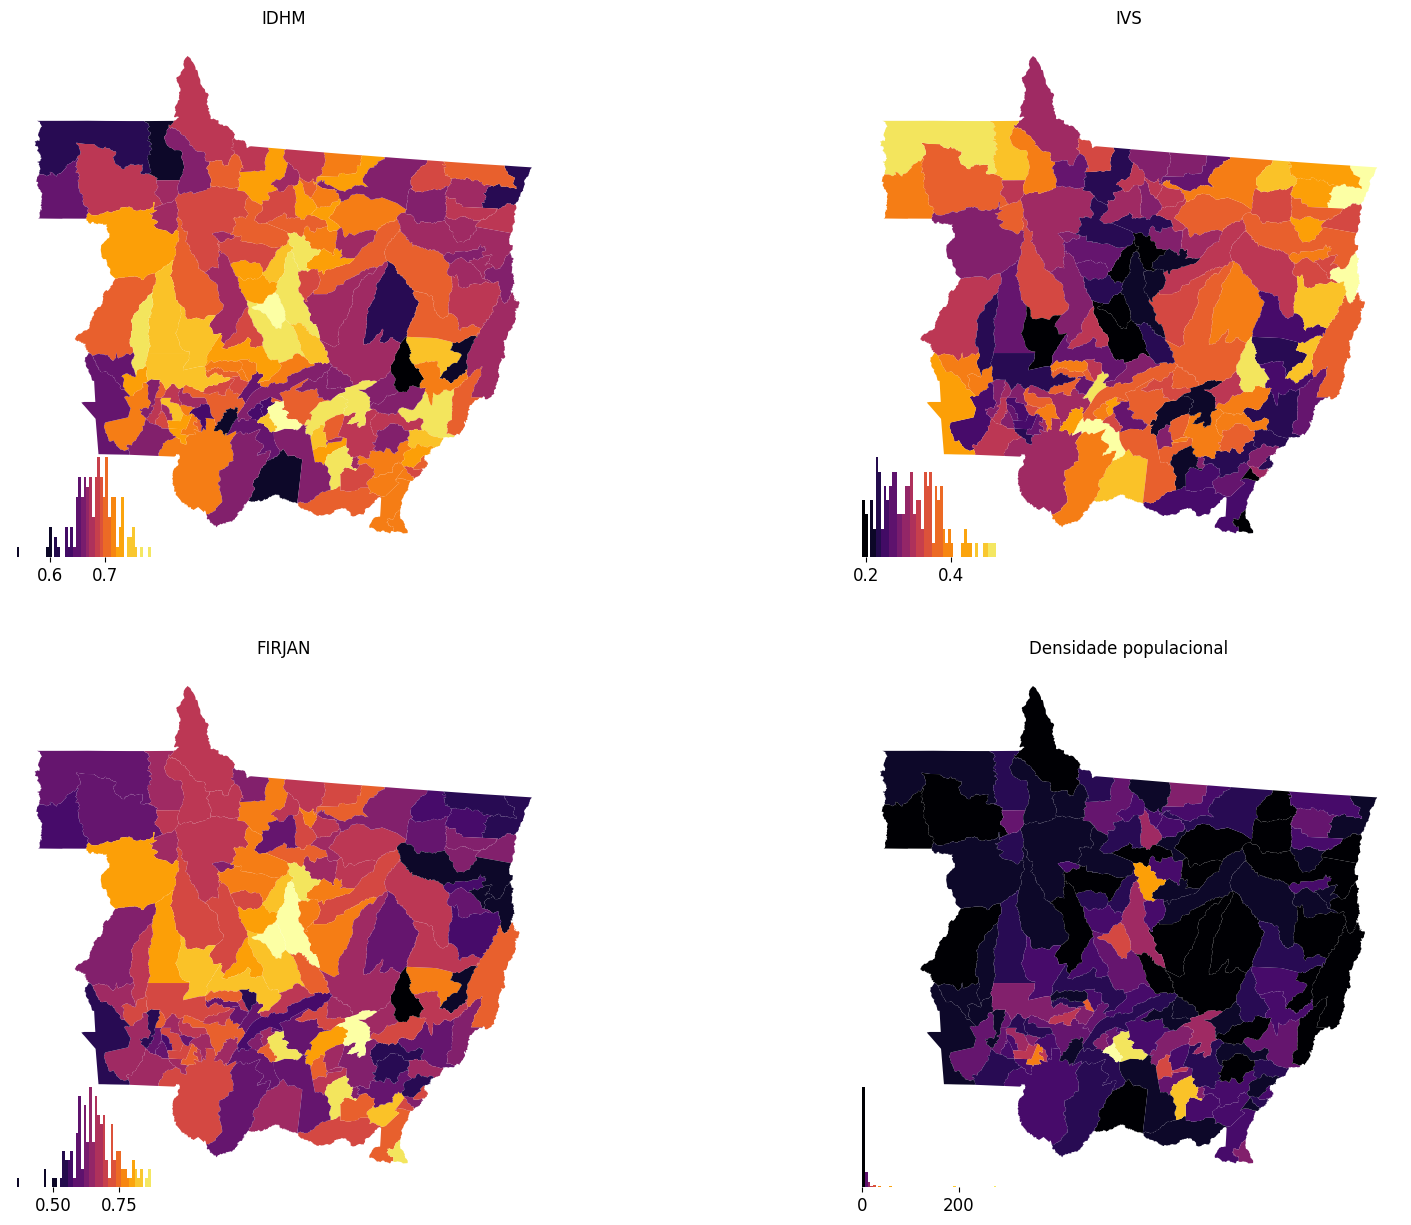

In [12]:
# Visualização
colunas = ['IDHM', 'IVS', 'FIRJAN', 'Densidade populacional']

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, coluna in enumerate(colunas):

    row = i // 2
    col = i % 2

    ax = gdf.plot(column=coluna, scheme='naturalbreaks', k=15, cmap='inferno', ax=axes[row, col])
    ax.axis("off")
    classifier = NaturalBreaks(gdf[coluna][~np.isnan(gdf[coluna])], k=15)
    bins = classifier.bins
    legendgram(plt.gcf(), ax, gdf[coluna], breaks=bins,
               pal=mplpal.Inferno_15, loc='lower left')
    axes[row, col].set_title(coluna)

plt.show()